# Boston Housing - Neural Network

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../data/processed/boston-clean.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
4,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.239640,7.088745,8.642597,0.064935,0.502103,6.226532,61.384416,4.280210,4.597403,307.510823,18.488745,391.551082,10.751126,22.474026
std,0.284721,12.359019,5.081881,0.246946,0.059117,0.403952,26.281942,1.630942,1.617242,63.494530,1.801293,6.513031,4.241587,4.290943
min,0.006320,0.000000,1.520000,0.000000,0.409000,5.344000,2.900000,1.668600,1.000000,188.000000,13.000000,372.080000,2.980000,11.900000
25%,0.071580,0.000000,5.190000,0.000000,0.448000,5.934000,41.800000,2.875500,4.000000,273.000000,17.400000,389.415000,7.380000,19.550000
50%,0.135870,0.000000,7.380000,0.000000,0.504000,6.153000,65.100000,4.052200,4.000000,300.000000,18.600000,393.970000,10.110000,22.000000
75%,0.268880,12.500000,10.010000,0.000000,0.538000,6.477500,84.350000,5.415900,5.000000,330.000000,19.600000,396.900000,13.480000,24.450000
max,2.242360,45.000000,25.650000,1.000000,0.647000,7.416000,100.000000,8.055500,8.000000,437.000000,21.200000,396.900000,23.090000,33.200000


## Scaling

In [4]:
columns_to_scale = df.drop(columns=["CHAS", "MEDV"]).columns
columns_to_scale

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
columns_to_scale = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS",
                    "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# target_scaler = StandardScaler()
# df["MEDV"] = target_scaler.fit_transform(df[["MEDV"]])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.821249,0.884775,-1.248819,0,0.608527,0.864520,0.145494,-0.116879,-2.229236,-0.181682,-1.774098,0.823047,-1.363560,24.0
1,-0.747367,-0.574814,-0.310124,0,-0.561178,0.482458,0.667897,0.422076,-1.609557,-1.033996,-0.383192,0.823047,-0.380665,21.6
2,-0.738427,-0.574814,-1.274455,0,-0.747652,0.504787,-0.102361,1.094987,-0.989878,-1.349668,0.117535,0.395284,-1.309217,28.7
3,-0.532727,0.438789,-0.152360,0,0.371195,-0.532238,0.198878,0.786705,0.249481,0.055072,-1.829734,0.623014,0.396672,22.9
4,-0.334701,0.438789,-0.152360,0,0.371195,-0.135291,1.323760,1.026350,0.249481,0.055072,-1.829734,0.823047,1.984425,27.1


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,231.000000
mean,1.614870e-16,4.613914e-17,-6.151885e-17,0.064935,-1.614870e-16,-1.845566e-16,-3.075943e-16,-9.996813e-17,0.000000,2.768348e-16,4.921508e-16,3.508497e-15,-3.383537e-16,22.474026
std,1.002172e+00,1.002172e+00,1.002172e+00,0.246946,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,4.290943
min,-8.212485e-01,-5.748141e-01,-1.404611e+00,0.000000,-1.578312e+00,-2.189493e+00,-2.230102e+00,-1.604766e+00,-2.229236,-1.886310e+00,-3.053731e+00,-2.996050e+00,-1.836105e+00,11.900000
25%,-5.915439e-01,-5.748141e-01,-6.808689e-01,0.000000,-9.171748e-01,-7.257497e-01,-7.467844e-01,-8.631575e-01,-0.370198,-5.447046e-01,-6.057366e-01,-3.286827e-01,-7.965052e-01,19.550000
50%,-3.652535e-01,-5.748141e-01,-2.489903e-01,0.000000,3.215054e-02,-1.824282e-01,1.416810e-01,-1.401059e-01,-0.370198,-1.185477e-01,6.189833e-02,3.722031e-01,-1.514805e-01,22.000000
75%,1.029202e-01,4.387894e-01,2.696584e-01,0.000000,6.085266e-01,6.226304e-01,8.757137e-01,6.978523e-01,0.249481,3.549599e-01,6.182607e-01,8.230474e-01,6.447587e-01,24.450000
max,7.049251e+00,3.074158e+00,3.353942e+00,1.000000,2.456321e+00,2.950974e+00,1.472473e+00,2.319818e+00,2.108520,2.043804e+00,1.508441e+00,8.230474e-01,2.915340e+00,33.200000


## Train / Test Split

In [7]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (184, 13)
Test Shape: (47, 13)


## Neural Network Regressor

In [72]:
model = MLPRegressor(random_state=1, max_iter=500,
                     hidden_layer_sizes=(100, 50, ),
                     n_iter_no_change=50,
                     early_stopping=True,
                     validation_fraction=0.1,
                     verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 257.61308749
Validation score: -53.937684
Iteration 2, loss = 255.26159336
Validation score: -53.449726
Iteration 3, loss = 252.95483464
Validation score: -52.982394
Iteration 4, loss = 250.70465714
Validation score: -52.521542
Iteration 5, loss = 248.50431037
Validation score: -52.072274
Iteration 6, loss = 246.34355640
Validation score: -51.636619
Iteration 7, loss = 244.20912649
Validation score: -51.211164
Iteration 8, loss = 242.11092288
Validation score: -50.789189
Iteration 9, loss = 240.04258465
Validation score: -50.377437
Iteration 10, loss = 237.99657167
Validation score: -49.972335
Iteration 11, loss = 235.96258495
Validation score: -49.564315
Iteration 12, loss = 233.94082136
Validation score: -49.152372
Iteration 13, loss = 231.92405463
Validation score: -48.729504
Iteration 14, loss = 229.90276085
Validation score: -48.296330
Iteration 15, loss = 227.86496226
Validation score: -47.861043
Iteration 16, loss = 225.80843759
Validation score: -47.421931
I

C:\ProgramData\Miniconda3\envs\ds-lasalle\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500,
             n_iter_no_change=50, random_state=1, verbose=True)

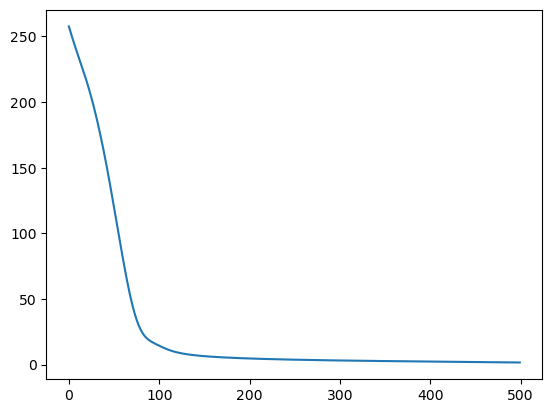

In [73]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

In [75]:
model.score(X_train, y_train)

0.7589000372844404

In [76]:
model.score(X_test, y_test)

0.7187866579779917

## Evaluation

### Train

In [67]:
y_pred = model.predict(X_train)

In [68]:
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred, squared=True)
rmse = mean_squared_error(y_train, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 1.9972699321294154
RMSE: 2.6531942352671027
MSE: 7.039439650054586


### Test

In [69]:
y_pred = model.predict(X_test)

In [77]:
np.std(y_test)

4.6448168126609595

In [78]:
np.std(y_pred)

5.4203501737056445

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 2.518580705147602
RMSE: 3.21479992945346
MSE: 10.334938586413973
